# Dissimilarity based on connectivity analysis

Connectivity can be measured as the probability of to voxels being connected, knowing that they belong to the same class of values. 

See the papers of [Renard and Allard (2013)](https://www.sciencedirect.com/science/article/pii/S0309170811002223?casa_token=woQblJzETg8AAAAA:EP2T6n5KGFh1CSnhFYwUGDSNcJ_qK_MyM7df0f5aNcqS_hPllijJTHBY8J2vFVRqlQELvqJRTQ) or [Meerschman et al. (2013)](https://www.sciencedirect.com/science/article/pii/S0098300412003299?casa_token=eM_liiR_q98AAAAA:t4ybsl4q_vOFWAsSVfn3aShtHohXJb9mGJaDf1frwlb3fp06EdlqGPUBoTX4zsEosxVvejebAQ) for more details.


In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from uncertaintyIndicators import dist_lpnorm_percentile_global_connectivity, dist_lpnorm_categorical_lag_connectivity, dist_lpnorm_percentile_lag_connectivity 

picklefilenameconnectivity = "./pickledata/testing-model-subset-connectivity.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 9
sample_num2 = 2
myseed = 65432
nblags = 12
pnorm = 2
maxnbsamples2D = 7E2
maxnbsamples3D = 1.5E3

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

# get dimensions
[nz,ny,nx,nbsamples]=mod_all.shape
nsamples = len(samples_ix) #!nbsamples=nb sub-samples while nsamples=nb noddy models!

# load classes
array = np.reshape(mod_all,(nz*ny*nx,nbsamples))
classes = np.unique(array)
vmin = np.amin(array)
vmax = np.amax(array)

# for 3D images
yyy,zzz,xxx=np.meshgrid(np.arange(1,ny+1),np.flip(np.arange(1,nz+1)),np.arange(1,nx+1))
# for 2D images
xx=np.reshape(xxx[0,:,:],(ny,nx))
yy=np.reshape(yyy[0,:,:],(ny,nx))
zz=np.reshape(zzz[0,:,:],(ny,nx))

maxh2D = np.sqrt(nx**2+ny**2)/2
maxh3D = np.sqrt(nx**2+ny**2+nz**2)/2

## Indicator connectivity
For each class, we compute the connectivity as the probability that 2 points of the same class are connected, as a function of lag distance.
### 3D case

03-Jun-2021 (23:21:13) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE START
indicator 0
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:659: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.06427428441662432


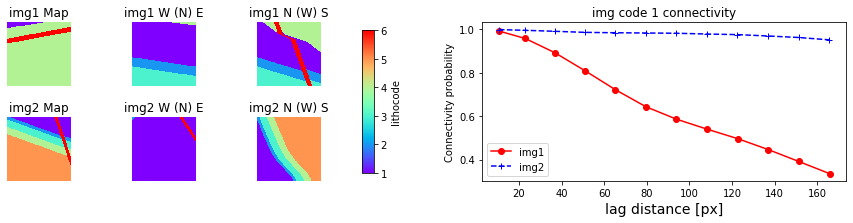

indicator 1
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:659: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.05963835398863695


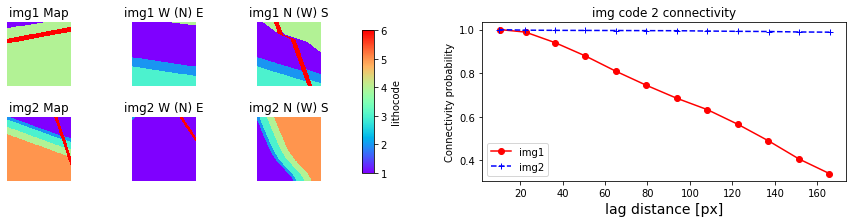

indicator 2
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:659: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.019481698782403162


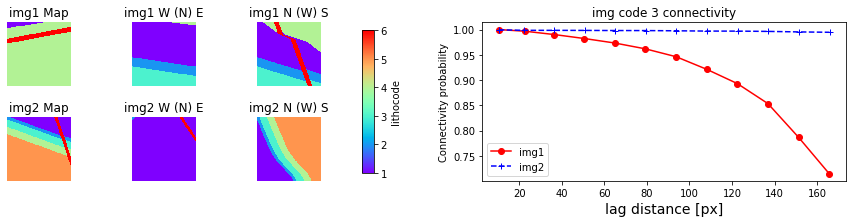

indicator 3
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:659: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.01959488335970984


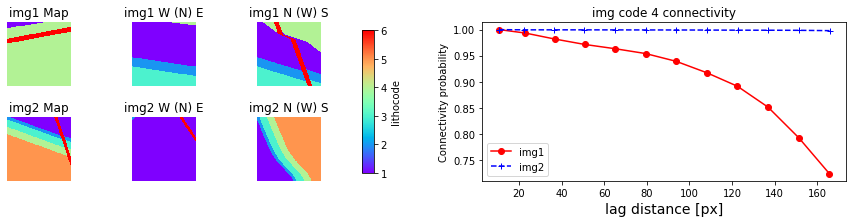

indicator 4
distance contribution: 0.16666666666666666


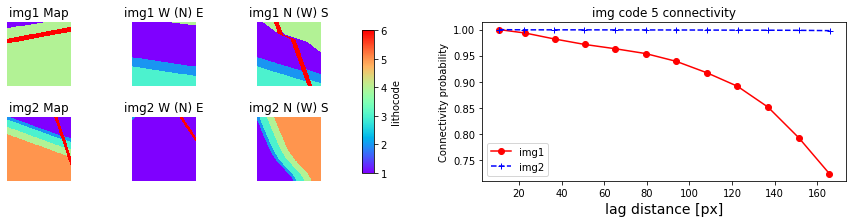

indicator 5
img1 compute indicator_lag_connectivity


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:659: RuntimeWarning: overflow encountered in long_scalars
  elif img1cnt*img2cnt==0:


computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0


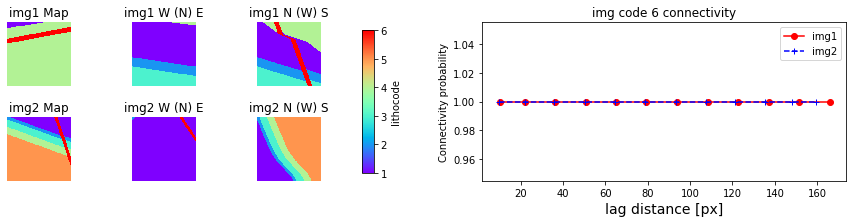

03-Jun-2021 (23:22:47) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE END


In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE START")
img1=mod_all[:,:,:,sample_num1].astype(int)
img2=mod_all[:,:,:,sample_num2].astype(int)
clblab='lithocode'
dist_lpnorm_categorical_lag_connectivity(img1,img2,xxx,yyy,zzz,nblags,maxh3D,maxnbsamples3D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE END")

### 2D case
Same definition

03-Jun-2021 (23:22:47) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE START
indicator 0
img1 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.08499173072676247


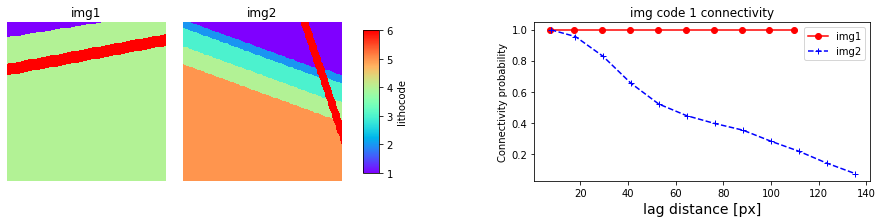

indicator 1
distance contribution: 0.16666666666666666


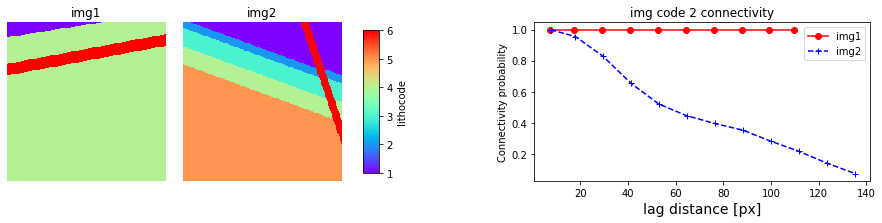

indicator 2
distance contribution: 0.16666666666666666


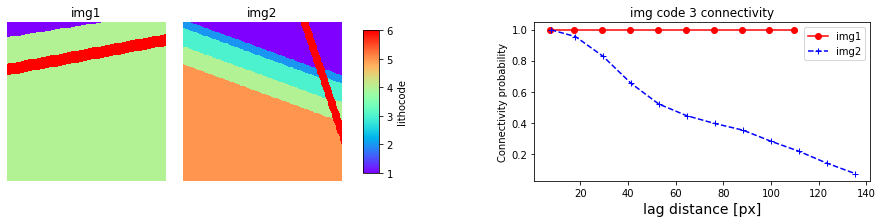

indicator 3
img1 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.023402243433235947


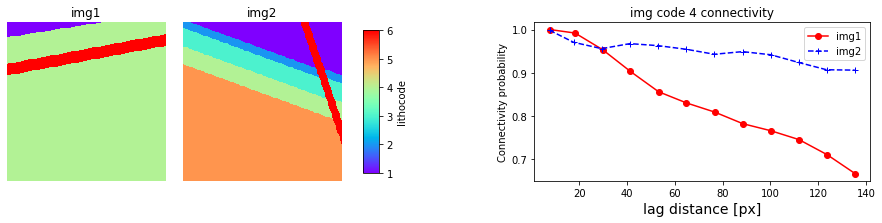

indicator 4
distance contribution: 0.16666666666666666


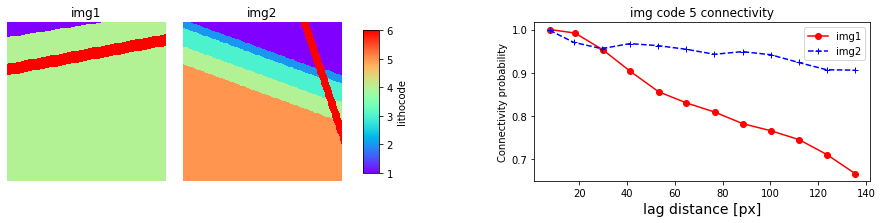

indicator 5
img1 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
img2 compute indicator_lag_connectivity
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0


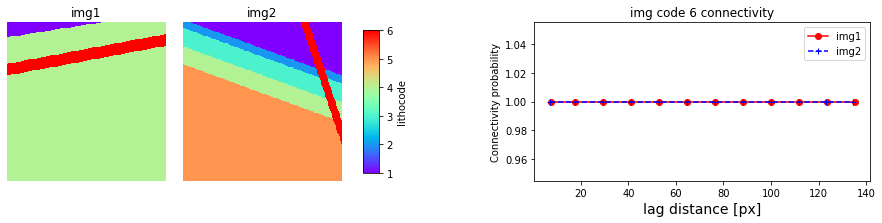

03-Jun-2021 (23:23:03) - COMPUTING INDICATOR CONNECTIVITY LITHOCODE END


In [3]:

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE START")
img1=np.reshape(mod_all[0,:,:,sample_num1].astype(int),(ny,nx))
img2=np.reshape(mod_all[0,:,:,sample_num2].astype(int),(ny,nx))
clblab='lithocode'
dist_lpnorm_categorical_lag_connectivity(img1,img2,xx,yy,zz,nblags,maxh2D,maxnbsamples2D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING INDICATOR CONNECTIVITY LITHOCODE END")

## Continuous detailed Connectivity
Percentiles of the empirical distribution define thresholds. Each Threshold delineates subset of points of higher and lower values, for which a categorica connectivity as func of lag distance can be computed. 
### 2D case

03-Jun-2021 (23:23:03) - COMPUTING percentile lag continuous CONNECTIVITY MAG START
5.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.009524336971850806
10.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - lower img2
computing 

computing connexion probability per lag
60.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
60.0th percentile connectivity - upper img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.008525511442445515
65.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
65.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
65.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
65.0th percentile connectivity - upper img2
computing distance and connexion for each sampled 

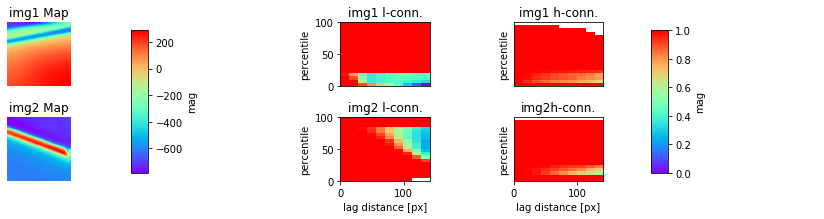

03-Jun-2021 (23:25:36) - COMPUTING percentile lag continuous CONNECTIVITY MAG END


In [4]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG START")
img1=mag_all[:,:,sample_num1].astype(int)
img2=mag_all[:,:,sample_num2].astype(int)
clblab='mag'
npctiles=20
nblags=10
dist_lpnorm_percentile_lag_connectivity(img1,img2,xx,yy,zz,npctiles,nblags,maxh2D,maxnbsamples2D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG END")


### 3D case

03-Jun-2021 (23:25:36) - COMPUTING percentile lag continuous CONNECTIVITY MAG START
5.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
5.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.025


C:\Users\00102908\UWA\loop-minex\uncertaintyIndicators\uncertaintyIndicators.py:753: RuntimeWarning: overflow encountered in long_scalars
  elif img1cntl*img2cntl==0:


10.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
10.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.025
15.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
15.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
15.0th percentile connectivity - upper img1
computing distance and connexion for each sampled pair of point
computing connexion probability per la

computing distance and connexion for each sampled pair of point
computing connexion probability per lag
90.0th percentile connectivity - upper img1
90.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0
95.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
95.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
95.0th percentile connectivity - upper img1
95.0th percentile connectivity - upper img2
weights: [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.]
distance contribution: 0.0
100.0th percentile connectivity - lower img1
computing distance and connexion for each sampled pair of point
computing connexion probability per lag
100.0th percentile connectivity - lower img2
computing distance and connexion for each sampled pair of point
computing connexion probabilit

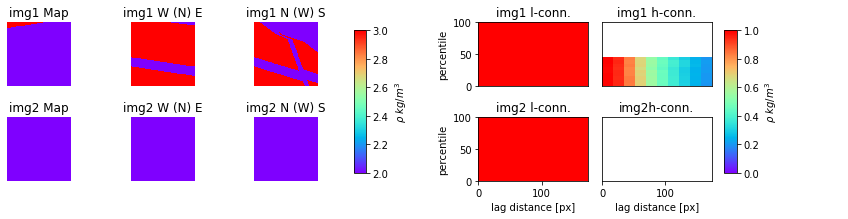

03-Jun-2021 (23:33:32) - COMPUTING percentile lag continuous CONNECTIVITY MAG END


In [5]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG START")
img1=rho_all[:,:,:,sample_num1].astype(int)
img2=rho_all[:,:,:,sample_num2].astype(int)
clblab="$\\rho$ $kg/m^3$"
npctiles=20
nblags=10
dist_lpnorm_percentile_lag_connectivity(img1,img2,xxx,yyy,zzz,npctiles,nblags,maxh3D,maxnbsamples3D,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING percentile lag continuous CONNECTIVITY MAG END")


## Continuous Global Connectivity
Same as above, without considering lag distance.

03-Jun-2021 (23:33:32) - COMPUTING Global CONTINUOUS CONNECTIVITY MAG START
global connectivity img1
Computing global percentile connectivity
5.0th percentile - global connectivity
10.0th percentile - global connectivity
15.0th percentile - global connectivity
20.0th percentile - global connectivity
25.0th percentile - global connectivity
30.0th percentile - global connectivity
35.0th percentile - global connectivity
40.0th percentile - global connectivity
45.0th percentile - global connectivity
50.0th percentile - global connectivity
55.0th percentile - global connectivity
60.0th percentile - global connectivity
65.0th percentile - global connectivity
70.0th percentile - global connectivity
75.0th percentile - global connectivity
80.0th percentile - global connectivity
85.0th percentile - global connectivity
90.0th percentile - global connectivity
95.0th percentile - global connectivity
100.0th percentile - global connectivity
global connectivity img2
Computing global percentile conne

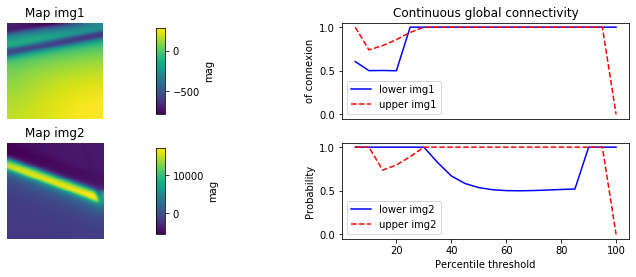

03-Jun-2021 (23:33:33) - COMPUTING Global CONTINUOUS CONNECTIVITY MAG END
03-Jun-2021 (23:33:33) - COMPUTING Global CONTINUOUS CONNECTIVITY RHO START
global connectivity img1
Computing global percentile connectivity
5.0th percentile - global connectivity
10.0th percentile - global connectivity
15.0th percentile - global connectivity
20.0th percentile - global connectivity
25.0th percentile - global connectivity
30.0th percentile - global connectivity
35.0th percentile - global connectivity
40.0th percentile - global connectivity
45.0th percentile - global connectivity
50.0th percentile - global connectivity
55.0th percentile - global connectivity
60.0th percentile - global connectivity
65.0th percentile - global connectivity
70.0th percentile - global connectivity
75.0th percentile - global connectivity
80.0th percentile - global connectivity
85.0th percentile - global connectivity
90.0th percentile - global connectivity
95.0th percentile - global connectivity
100.0th percentile - glob

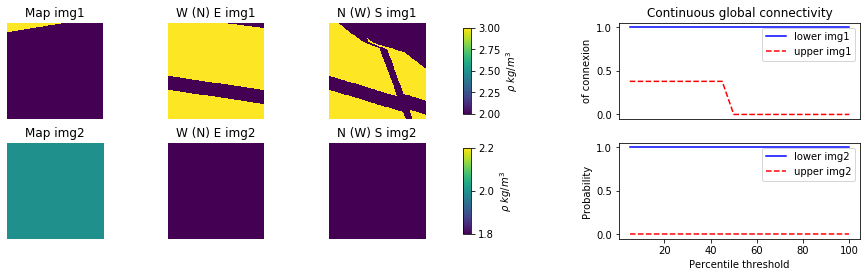

03-Jun-2021 (23:34:09) - COMPUTING Global CONTINUOUS CONNECTIVITY RHO END


In [6]:
# 2D case
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY MAG START")
img1=mag_all[:,:,sample_num1].astype(int)
img2=mag_all[:,:,sample_num2].astype(int)
npctiles=20
clblab='mag'
dist_lpnorm_percentile_global_connectivity(img1,img2,npctiles,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY MAG END")

# 3D case
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY RHO START")
img1=rho_all[:,:,:,sample_num1].astype(int)
img2=rho_all[:,:,:,sample_num2].astype(int)
npctiles=20
clblab="$\\rho$ $kg/m^3$"
dist_lpnorm_percentile_global_connectivity(img1,img2,npctiles,pnorm,clblab=clblab,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING Global CONTINUOUS CONNECTIVITY RHO END")

## Compute for all pair of realizations

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL START")
npctiles=20

dist_cty_mag = np.zeros((nsamples,nsamples))
dist_cty_grv = np.zeros((nsamples,nsamples))
dist_cty_mod = np.zeros((nsamples,nsamples))
dist_cty_rho = np.zeros((nsamples,nsamples))
dist_cty_sus = np.zeros((nsamples,nsamples))

k=0
for i in range(nsamples):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_cty_mag[i,j] = dist_lpnorm_percentile_global_connectivity(mag_all[:,:,i],mag_all[:,:,j],npctiles,pnorm)
        dist_cty_grv[i,j] = dist_lpnorm_percentile_global_connectivity(grv_all[:,:,i],grv_all[:,:,j],npctiles,pnorm)
        dist_cty_mod[i,j] = dist_lpnorm_categorical_lag_connectivity(mod_all[:,:,:,i],mod_all[:,:,:,j],xxx,yyy,zzz,nblags,maxh3D,maxnbsamples3D,pnorm)
        dist_cty_rho[i,j] = dist_lpnorm_percentile_global_connectivity(rho_all[:,:,:,i],rho_all[:,:,:,j],npctiles,pnorm)
        dist_cty_sus[i,j] = dist_lpnorm_percentile_global_connectivity(sus_all[:,:,:,i],sus_all[:,:,:,j],npctiles,pnorm)
        dist_cty_mag[j,i] = dist_cty_mag[i,j]
        dist_cty_grv[j,i] = dist_cty_grv[i,j]
        dist_cty_mod[j,i] = dist_cty_mod[i,j]
        dist_cty_rho[j,i] = dist_cty_rho[i,j]
        dist_cty_sus[j,i] = dist_cty_sus[i,j]

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL END")


## Some Multi-Dimensional Scaling plots

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                    dissimilarity="precomputed", n_jobs=1)

mdspos_mag = mds.fit(dist_cty_mag).embedding_
mdspos_grv = mds.fit(dist_cty_grv).embedding_
mdspos_mod = mds.fit(dist_cty_mod).embedding_
mdspos_rho = mds.fit(dist_cty_rho).embedding_
mdspos_sus = mds.fit(dist_cty_sus).embedding_

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 100
plt.scatter(mdspos_mag[:, 0], mdspos_mag[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mag', marker='o')
plt.scatter(mdspos_grv[:, 0], mdspos_grv[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='grv', marker='^')
plt.scatter(mdspos_mod[:, 0], mdspos_mod[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='litho', marker='v')
plt.scatter(mdspos_rho[:, 0], mdspos_rho[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='rho', marker='<')
plt.scatter(mdspos_sus[:, 0], mdspos_sus[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='sus. mag.', marker='>')
plt.legend(scatterpoints=1, loc='best', shadow=False)
ax.set_title('2D Multi-Dimensional Scaling Representation of (dis-)similarities')
plt.show()

ix=np.tril_indices(nsamples,k=-1)
df= pd.DataFrame({'mag':dist_cty_mag[ix], 'grv':dist_cty_grv[ix], 'litho':dist_cty_mod[ix], 'rho':dist_cty_rho[ix], 'sus':dist_cty_sus[ix]})
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")


## Save indicators

In [ ]:
with open(picklefilenameconnectivity, 'wb') as f:
    pickle.dump([dist_cty_mag,dist_cty_grv,dist_cty_mod,dist_cty_rho,dist_cty_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus], f)